#Daffa Rizki Rizaly - 2301931251

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv') 

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Preprocessing

In [4]:
#Checking for Missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [8]:
df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [9]:
df['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

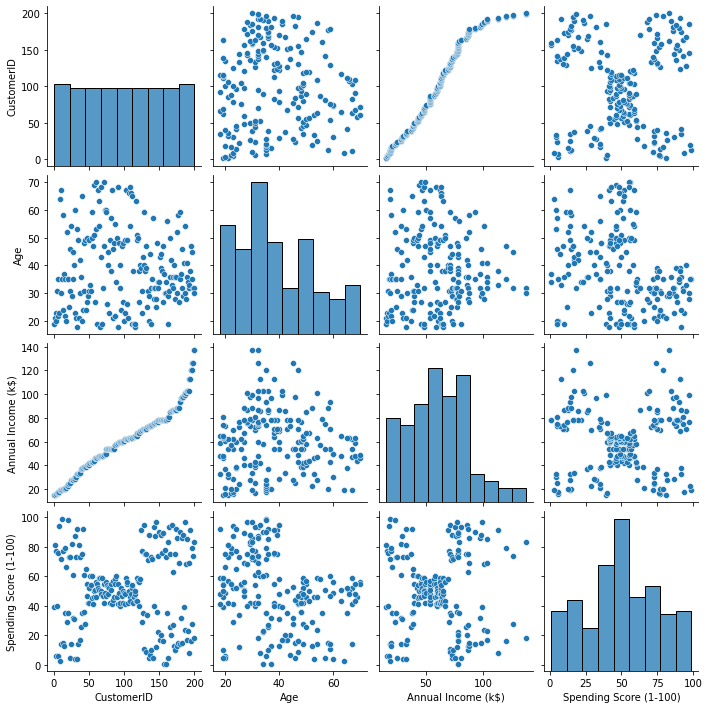

In [10]:
df = df[['CustomerID','Genre','Age','Annual Income (k$)','Spending Score (1-100)']]

sns.pairplot(df, kind="scatter")
plt.show()

In [11]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [12]:
Correlation = df.corr()
Correlation['Spending Score (1-100)'].abs().sort_values(ascending = False)

Spending Score (1-100)    1.000000
Age                       0.327227
CustomerID                0.013835
Annual Income (k$)        0.009903
Name: Spending Score (1-100), dtype: float64

In [13]:
x = df[['Age','Annual Income (k$)']].values #independent variable
y = df[['Spending Score (1-100)']].values #dependent variable

In [14]:
#Normalize the dataset using StandardScaler, I am using StandardScaler as we don't know the min-max value
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
#Spliting Dataset with 20% test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [16]:
print(x_train)

[[ 0.7284319  -0.25039146]
 [-0.49160182  2.49780745]
 [-0.20453507 -0.89927175]
 [ 1.08726535 -1.24279661]
 [ 0.08253169  0.32214998]
 [-0.27630176  2.26879087]
 [-1.13750203 -1.20462718]
 [-0.27630176 -1.43364376]
 [-0.49160182  0.58933599]
 [ 1.15903204 -0.13588317]
 [-1.49633548  0.16947227]
 [-0.20453507  1.00919971]
 [-1.20926872 -1.66266033]
 [ 0.29783176  0.39848884]
 [ 0.7284319   0.16947227]
 [ 1.51786549 -0.40306917]
 [ 1.30256542  0.55116656]
 [ 0.65666521  0.01679455]
 [-0.20453507  1.00919971]
 [ 0.58489852 -0.02137488]
 [-0.49160182  1.00919971]
 [-0.85043527 -0.02137488]
 [-1.28103541 -1.16645776]
 [ 1.37433211 -1.54815205]
 [-1.28103541 -1.05194947]
 [ 0.80019859  0.24581112]
 [ 0.65666521 -0.82293289]
 [-0.20453507  1.61991057]
 [ 2.091999   -0.05954431]
 [ 0.36959845  0.4748277 ]
 [-0.41983513 -0.70842461]
 [ 0.08253169  0.39848884]
 [-1.42456879  0.78018313]
 [-1.06573534 -0.86110232]
 [ 0.87196528  0.24581112]
 [-1.42456879  0.13130284]
 [ 0.44136514 -1.24279661]
 

In [17]:
print(y_train)

[[42]
 [74]
 [26]
 [14]
 [58]
 [79]
 [87]
 [98]
 [87]
 [58]
 [48]
 [92]
 [76]
 [35]
 [59]
 [56]
 [ 5]
 [42]
 [10]
 [47]
 [63]
 [50]
 [73]
 [15]
 [81]
 [57]
 [36]
 [85]
 [55]
 [ 7]
 [60]
 [95]
 [ 5]
 [92]
 [43]
 [46]
 [32]
 [72]
 [41]
 [54]
 [ 6]
 [48]
 [55]
 [68]
 [69]
 [46]
 [83]
 [17]
 [23]
 [55]
 [ 5]
 [93]
 [48]
 [92]
 [99]
 [16]
 [73]
 [ 6]
 [61]
 [56]
 [40]
 [ 4]
 [40]
 [97]
 [48]
 [12]
 [14]
 [52]
 [42]
 [36]
 [20]
 [39]
 [18]
 [76]
 [55]
 [91]
 [51]
 [28]
 [93]
 [31]
 [35]
 [43]
 [89]
 [ 1]
 [82]
 [73]
 [39]
 [74]
 [55]
 [75]
 [27]
 [47]
 [42]
 [16]
 [61]
 [10]
 [77]
 [42]
 [60]
 [71]
 [32]
 [14]
 [97]
 [42]
 [51]
 [14]
 [94]
 [52]
 [41]
 [44]
 [15]
 [86]
 [46]
 [ 3]
 [77]
 [46]
 [75]
 [75]
 [66]
 [49]
 [86]
 [ 5]
 [95]
 [88]
 [59]
 [45]
 [46]
 [52]
 [28]
 [51]
 [42]
 [60]
 [73]
 [46]
 [35]
 [ 8]
 [75]
 [73]
 [78]
 [91]
 [81]
 [54]
 [90]
 [ 9]
 [88]
 [55]
 [49]
 [43]
 [55]
 [47]
 [40]
 [83]
 [35]
 [17]
 [42]
 [50]
 [13]
 [49]
 [90]
 [59]]


In [18]:
#Making the model using sklearn.linear_model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
model = LinearRegression().fit(x_train, y_train)

In [19]:
#Insert the prediction to y_pred
y_pred = model.predict(x_test)

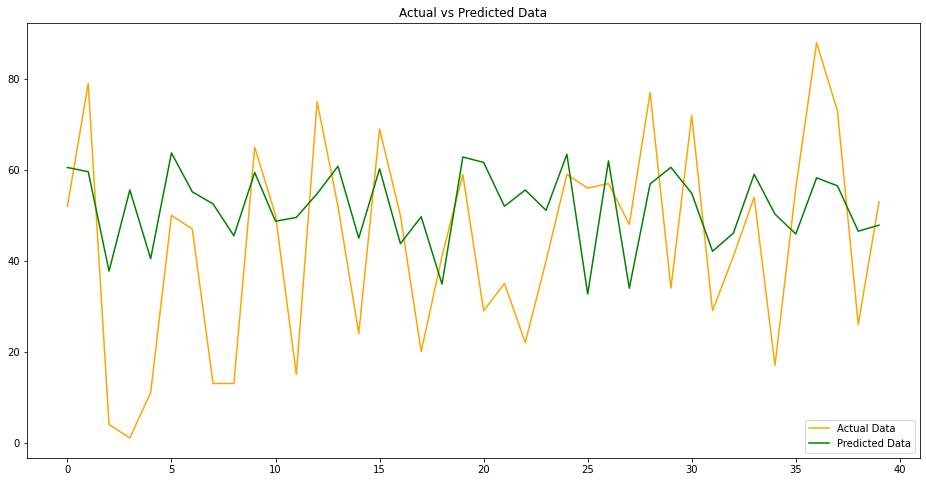

In [20]:
plt.figure(figsize=(16,8))
plt.plot(y_test, 'orange')
plt.plot(y_pred, 'green')
plt.title('Actual vs Predicted Data')
plt.legend(['Actual Data', 'Predicted Data'], loc = "lower right")
plt.show()

In [21]:
print(y_test)

[[52]
 [79]
 [ 4]
 [ 1]
 [11]
 [50]
 [47]
 [13]
 [13]
 [65]
 [50]
 [15]
 [75]
 [52]
 [24]
 [69]
 [50]
 [20]
 [41]
 [59]
 [29]
 [35]
 [22]
 [40]
 [59]
 [56]
 [57]
 [48]
 [77]
 [34]
 [72]
 [29]
 [41]
 [54]
 [17]
 [56]
 [88]
 [73]
 [26]
 [53]]


In [22]:
print(y_pred)

[[60.53107371]
 [59.61532685]
 [37.74581617]
 [55.58060323]
 [40.4817971 ]
 [63.7393247 ]
 [55.18843905]
 [52.51607607]
 [45.49693117]
 [59.43155008]
 [48.70622782]
 [49.55626543]
 [54.76852725]
 [60.80621603]
 [44.99900479]
 [60.22922943]
 [43.7824593 ]
 [49.68768393]
 [34.8773711 ]
 [62.84923415]
 [61.64394832]
 [52.00689002]
 [55.58060323]
 [51.10240283]
 [63.43852608]
 [32.69062916]
 [61.98479989]
 [33.97392956]
 [56.92961288]
 [60.570081  ]
 [54.84863314]
 [42.09364374]
 [46.08726875]
 [59.03834024]
 [50.27697586]
 [45.90349199]
 [58.26527155]
 [56.49739575]
 [46.51844023]
 [47.84179356]]


Evaluation

In [25]:
#Evaluate the model on training accuary, testing accuracy
print("Training Accuracy:",model.score(x_train,y_train)*100)
print("Testing Accuracy:",model.score(x_test,y_test)*100)

#Evaluate the model using sklearn.metrics mse and r2_score
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print ("MSE :", MSE)
print ("R2 :", score)
print ('coeeffecient:\n',model.coef_)

Training Accuracy: 9.92705039618469
Testing Accuracy: 1.9631778132180089
MSE : 483.55682175408344
R2 : 0.01963177813218009
coeeffecient:
 [[-8.21121795  1.37173307]]
